# Contando Palavras
Neste capítulo iremos começar a interagir com os textos no nível da linguagem, por meio das ferramentas do Processamento de Linguagem Natural (PLN). Vamos progredir gradualmente nossa representação da linguagem a partir da morfologia, passando pela sintaxe e chegando à semântica. 

Nesta etapa, faremos uso de biliotecas especializadas em PLN como o [NLTK](https://www.nltk.org/) e a [Spacy](https://spacy.io/). 

In [1]:
import nltk
import spacy
from collections import Counter
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Bibliotecas de PLN requerem o carregamento de modelos de liguagem para funcionar de maneira apropriada: para este capitulo iremos carregar os modelos específicos da lingua portuguesa. Para isso precisamos executar comandos no terminal do sistema operacional:

In [23]:
!python3 -m spacy download pt

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✘ Couldn't link model to 'pt'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
⚠ Download successful but linking failed
Creating a shortcut link for 'pt' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('pt_core_news_sm')


In [24]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Para contar as palavras de um texto, é preciso primeiro separá-las uma a uma. A este processo dá-se o nome de tokenização, e é típicamente fácil de fazer mal-feito e difícil de fazer bem-feito.

Primeiramente precisaremos carregar os verbetes com a função que criamos no capítulo 1.

In [11]:
import glob, os
caminho = "../../dhbb/text/*.text"
arquivos  = glob.glob(caminho)

def tabula_verbete(n=None):
    """
    Carrega todos os verbetes disponíveis, ou os primeiros n.
    n:  número de verbetes a tabular
    """
    if n is None:
        n = len(arquivos)
    linhas = []
    for a in arquivos[:n]:
        with open (a, 'r', encoding='utf8') as f:
            verbete = f.read()
        cabeçalho = verbete.split('---')[1]
        campos = {l.split(':')[0].strip() :l.split(':')[1].strip() for l in cabeçalho.split('\n')[:4] if l}
        campos['arquivo'] = os.path.split(a)[1]
        campos['cargos'] = pd.np.nan if 'cargos:' not in cabeçalho else cabeçalho.split('cargos:')[1]
        campos['corpo'] = verbete.split('---')[2]
        linhas.append(campos)
    tabela = pd.DataFrame(data = linhas, columns=['arquivo','title', 'natureza', 'sexo', 'cargos', 'corpo'])
    return tabela

## Tokenização com o nltk

In [12]:
tabela = tabula_verbete()

In [27]:
tabela.head()

,arquivo,title,natureza,sexo,cargos,corpo
0,1.text,"COELHO, Machado",biográfico,m,\n - dep. fed. DF 1927-1929 \n - dep. fed. DF ...,\n\n«José Machado Coelho de Castro» nasceu em ...
1,10.text,"ABÍLIO, Armando",biográfico,m,\n - dep. fed. PB 1995-1999\n - dep. fed. PB ...,\n\n«Armando Abílio Vieira» nasceu em Itaporan...
2,100.text,"ALEIXO, Pedro",biográfico,m,\n - const. 1934\n - dep. fed. MG 1935-1937\n ...,"\n\n«Pedro Aleixo» nasceu em São Caetano, dist..."
3,1000.text,"CAMPOS, Eduardo",biográfico,m,\n - dep. fed. PE 1995\n - dep. fed. PE 1998-...,\n\n«Eduardo Henrique Accioly Campos» nasceu e...
4,1001.text,"CAMPOS, Eleazar Soares",biográfico,m,\n - magistrado\n - interv. MA 1945-1946\n,\n\n«Eleazar Soares Campos» nasceu em São Luís...


In [13]:
palavras = nltk.word_tokenize(tabela.corpo[0])
palavras[:10]

['«',
 'José',
 'Machado',
 'Coelho',
 'de',
 'Castro',
 '»',
 'nasceu',
 'em',
 'Lorena']

Uma vez "tokenizado" o texto podemos contar as palavras muito simplesmente usando a função `Counter`do Python

In [28]:
writer = ix.writer()c = Counter(palavras)
c.most_common(n=10)

[('de', 22),
 (',', 20),
 ('em', 16),
 ('.', 14),
 ('a', 10),
 ('no', 8),
 ('e', 7),
 ('da', 6),
 ('(', 5),
 (')', 5)]

Outra maneira de fazer isso seria usando o NLTK. Com a vantagem de ainda podermos visualizar graficamente.

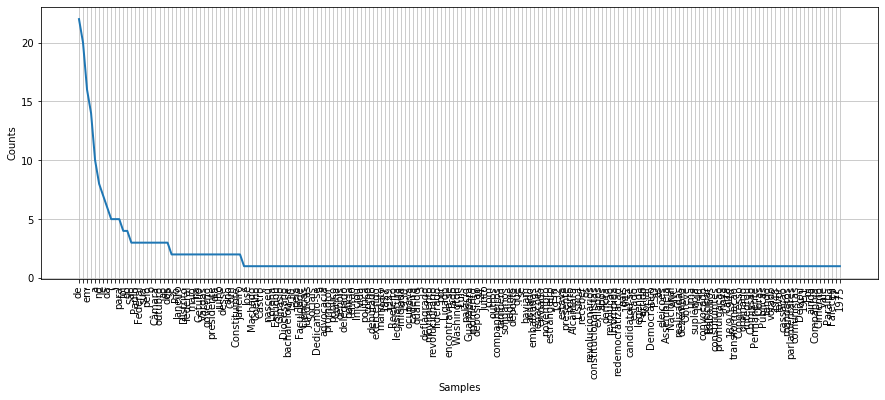

In [29]:
figure(figsize=(15,5))
fd = nltk.FreqDist(palavras)
fd.plot();

Como vemos no exemplo acima, as palavras mais frequentes não muito informativas. Muitas vezes pode ser útil removê-las da análise. Linguistas costumams chamar este tipo de palavras de **stop-words**. Alem disso, vamos tambem remover as pontuaçoes. 

In [30]:
sw = nltk.corpus.stopwords.words('portuguese')
from string import punctuation
sw[:5]

['de', 'a', 'o', 'que', 'e']

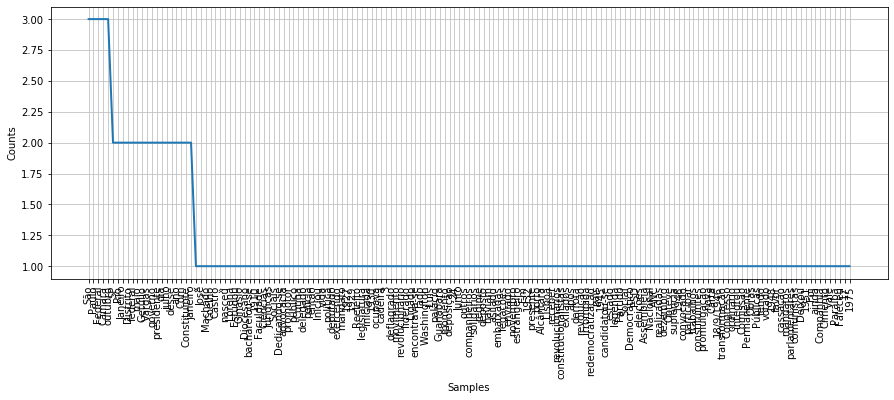

In [31]:
figure(figsize=(15,5))
fd = nltk.FreqDist([p for p in palavras if p not in sw+list(punctuation)])
fd.plot();

# Analizando coleções de textos
Acima analizamos o conteúdo de apenas um verbete, mas seria bem mais relevante podermos fazer a análise em uma coleção de verbetes. Para isso aprenderemos a criar um objeto `TextCollection` que como o nome diz, representa uma coleção de texto, mas que nos permite a realização de análises a nível de coleção.

In [91]:
tc = nltk.TextCollection([nltk.word_tokenize(c) for c in tabela.corpo])

In [92]:
nltk.FreqDist(tc)

FreqDist({',': 716483, 'de': 616579, '.': 311366, 'a': 270864, 'do': 267191, 'e': 237302, 'da': 215775, 'o': 189531, 'em': 175544, 'que': 100354, ...})

In [93]:
tc.concordance('filho de')

no matches


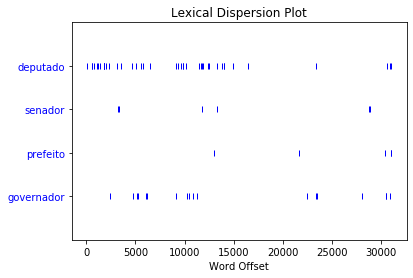

In [35]:
tc.dispersion_plot(['deputado', 'senador', 'prefeito', 'governador'])

# Separando frases
Além de quebrar os textos em seus tokens constituintes, podemos também dividi-los por frases, o que pode ser mais convenientes para certas análises. Para isso utilizamos a função `sent_tokenize` do nltk.

In [36]:
nltk.tokenize.sent_tokenize(tabela.corpo[0])

['\n\n«José Machado Coelho de Castro» nasceu em Lorena (SP).',
 'Estudou no Ginásio Diocesano de São Paulo e bacharelou-se em 1910 pela\nFaculdade de Ciências Jurídicas e Sociais.',
 'Dedicando-se à advocacia, foi\npromotor público em Cunha (SP) e depois delegado de polícia no Rio de\nJaneiro, então Distrito Federal.',
 'Iniciou sua vida política como deputado federal pelo Distrito Federal,\nexercendo o mandato de 1927 a 1929.',
 'Reeleito para a legislatura iniciada\nem maio de 1930, ocupava sua cadeira na Câmara quando, em 3 de outubro,\nfoi deflagrado o movimento revolucionário liderado por Getúlio Vargas.',
 'Ligado ao governo federal, encontrava-se ao lado do presidente\nWashington Luís, no palácio Guanabara, no momento de sua deposição no\ndia 24 de outubro.',
 'Junto com outros companheiros também solidários ao\nregime deposto e que se haviam asilado em embaixadas e legações, foi\nenviado em novembro para o estrangeiro.',
 'Em outubro de 1932, estava\npresente no porto de Alcânt

# Busca textual
Realizar uma busca textual em uma coleção de textos é muito mais eficiente do que simplesmente realizar operações sobre coleções de strings. Neste capítulo iremos examinar como "indexar" o DHBB, usando um simples indexador/buscador chamado [whoosh](https://whoosh.readthedocs.io). 

In [103]:
from whoosh.index import create_in
from whoosh.fields import *
from IPython.core.display import display, HTML

In [94]:
schema = Schema(title=TEXT(stored=True), caminho=ID(stored=True), corpo=TEXT(stored=True))

In [95]:
if not os.path.exists('indexdir'):
    os.mkdir('indexdir')
ix = create_in("indexdir", schema)

In [96]:
writer = ix.writer()

In [97]:
for v in tabela.itertuples():
    writer.add_document(title=v.title, caminho=v.arquivo,corpo=v.corpo)
writer.commit()

In [98]:
from whoosh.qparser import QueryParser

In [99]:
def busca(consulta):
    query = QueryParser("corpo", ix.schema).parse(consulta)
    with ix.searcher() as searcher:
        results = [(dict(hit),hit.highlights("corpo")) for hit in searcher.search(query, limit=None)]
        print(results[10])
    return results
    

In [108]:
resultados = busca('"filho de"')
type(resultados[:5])

({'caminho': '3666.text', 'corpo': '\n\n«Cândido Mota Filho» nasceu na cidade de São Paulo no dia 16 de setembro\nde 1897, filho de Cândido Nazianzeno Nogueira da Mota e de Clara do\nAmaral Mota. Seu pai - que, segundo o próprio Mota Filho, exerceu sobre\nele profunda influência cultural - foi advogado, professor de direito\npenal da Faculdade de Direito de São Paulo, deputado federal\n(1909-1917), secretário de Agricultura (1916-1920) e senador estadual\n(1922-1930) em São Paulo.\n\nFez o curso primário na Escola Caetano de Campos e no Grupo Escolar do\nArouche, na capital paulista, e o secundário no Colégio Santo Inácio, no\nRio de Janeiro, então Distrito Federal, concluindo-o no Ginásio Nogueira\nda Gama, em sua cidade natal. Tendo ingressado na Faculdade de Direito\nde São Paulo, bacharelou-se em 1919.\n\nAinda na capital do estado, logo após a formatura foi eleito juiz de paz\ndo bairro de Santa Cecília. Integrou o Partido Republicano Paulista\n(PRP) e foi oficial-de-gabinete de s

list

In [111]:
display(HTML(resultados[][1]))